In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:

# Set the theme in Seaborn
sns.set_theme(style="darkgrid", font="Arial", font_scale=1.5)

# Set the font size in Matplotlib
plt.rcParams.update({'font.size': 15})

# Set the background style in Matplotlib
plt.rcParams['axes.facecolor'] = 'black'

matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### Dimensionality reduction part

### Principal Component Analysis

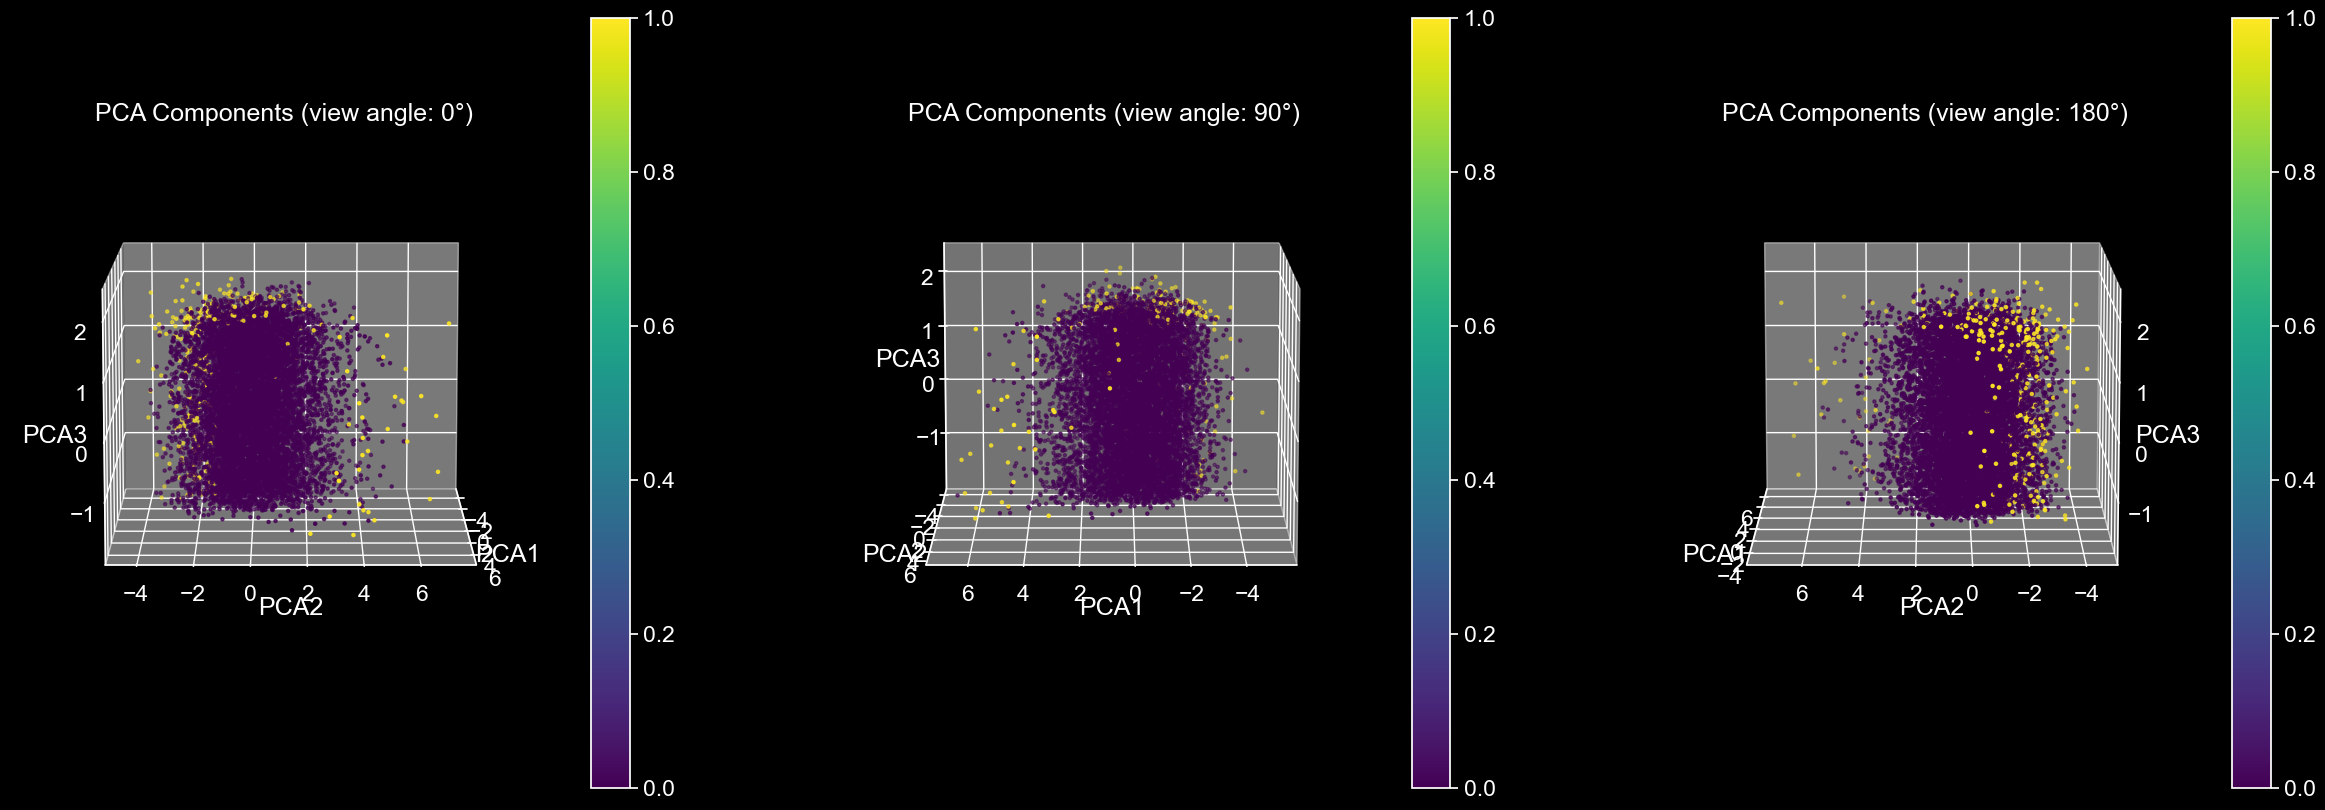

In [52]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns and the target columns from features
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_features)

# Add PCA components to the dataframe
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]
data['PCA3'] = pca_components[:, 2]

# Plotting the PCA components with smaller dots and different perspectives
fig = plt.figure(figsize=(30, 10))

# Different perspectives
angles = [0, 90, 180]

for i, angle in enumerate(angles):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    sc = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=data[target], cmap='viridis', s=5)  # smaller dots
    ax.view_init(elev=10, azim=angle)
    plt.colorbar(sc, ax=ax)
    ax.set_title(f'PCA Components (view angle: {angle}°)')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

plt.show()

### Linear Discriminant Analysis

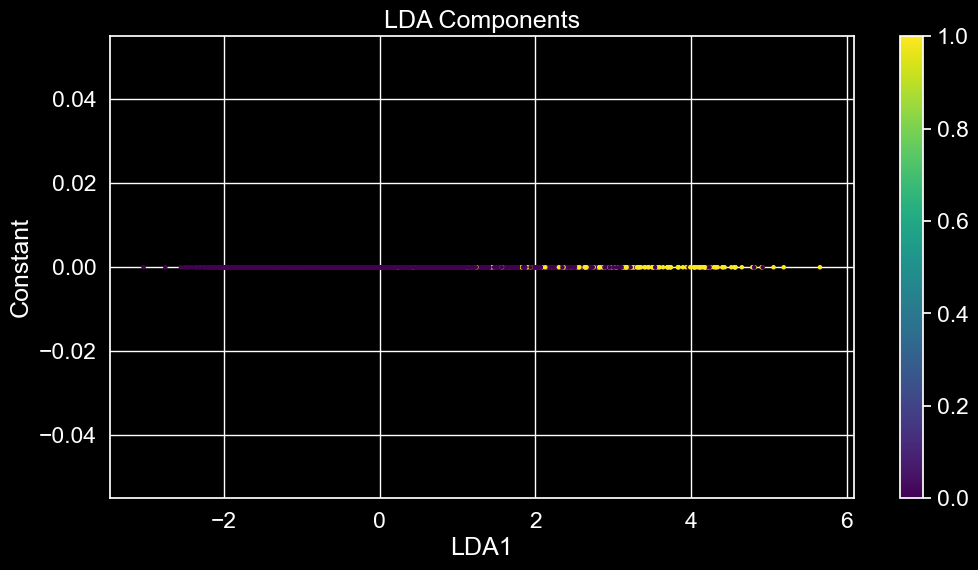

In [56]:
# LDA - set n_components to min(n_features, n_classes - 1)
n_classes = data[target].nunique()
lda_n_components = min(len(features), n_classes - 1)
lda = LDA(n_components=lda_n_components)
lda_components = lda.fit_transform(scaled_features, data[target])

# Add LDA components to the dataframe
data['LDA1'] = lda_components[:, 0]
if lda_n_components > 1:
    data['LDA2'] = lda_components[:, 1]
if lda_n_components > 2:
    data['LDA3'] = lda_components[:, 2]

# Plotting the LDA components
fig, ax = plt.subplots(figsize=(12, 6))
if lda_n_components == 1:
    sc = ax.scatter(data['LDA1'], np.zeros_like(data['LDA1']), c=data[target], cmap='viridis', s=5)
    ax.set_ylabel('Constant')
elif lda_n_components == 2:
    sc = ax.scatter(data['LDA1'], data['LDA2'], c=data[target], cmap='viridis', s=5)
    ax.set_ylabel('LDA2')
else:
    fig = plt.figure(figsize=(18, 6))
    angles = [0, 90, 180]
    for i, angle in enumerate(angles):
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')
        sc = ax.scatter(data['LDA1'], data['LDA2'], data['LDA3'], c=data[target], cmap='viridis', s=5)  # smaller dots
        ax.view_init(elev=10, azim=angle)
        plt.colorbar(sc, ax=ax)
        ax.set_title(f'LDA Components (view angle: {angle}°)')
        ax.set_xlabel('LDA1')
        ax.set_ylabel('LDA2')
        ax.set_zlabel('LDA3')

plt.colorbar(sc)
ax.set_title('LDA Components')
ax.set_xlabel('LDA1')

plt.show()

### ANOVA analysis

In [59]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Perform ANOVA
anova_results = {}
for feature in features:
    groups = [data[data[target] == cls][feature].values for cls in data[target].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[feature] = {'F-value': f_val, 'p-value': p_val}

# Display the results
anova_results_df = pd.DataFrame.from_dict(anova_results, orient='index')
anova_results_df = anova_results_df.sort_values(by='p-value')

# Print the results
print(anova_results_df)


                            F-value       p-value
Torque [Nm]              379.867723  4.573805e-83
Tool wear [min]          112.421077  3.976076e-26
Air temperature [K]       68.608385  1.354800e-16
Rotational speed [rpm]    19.559690  9.853543e-06
Process temperature [K]   12.935260  3.240058e-04


### PCA but with failure type as target

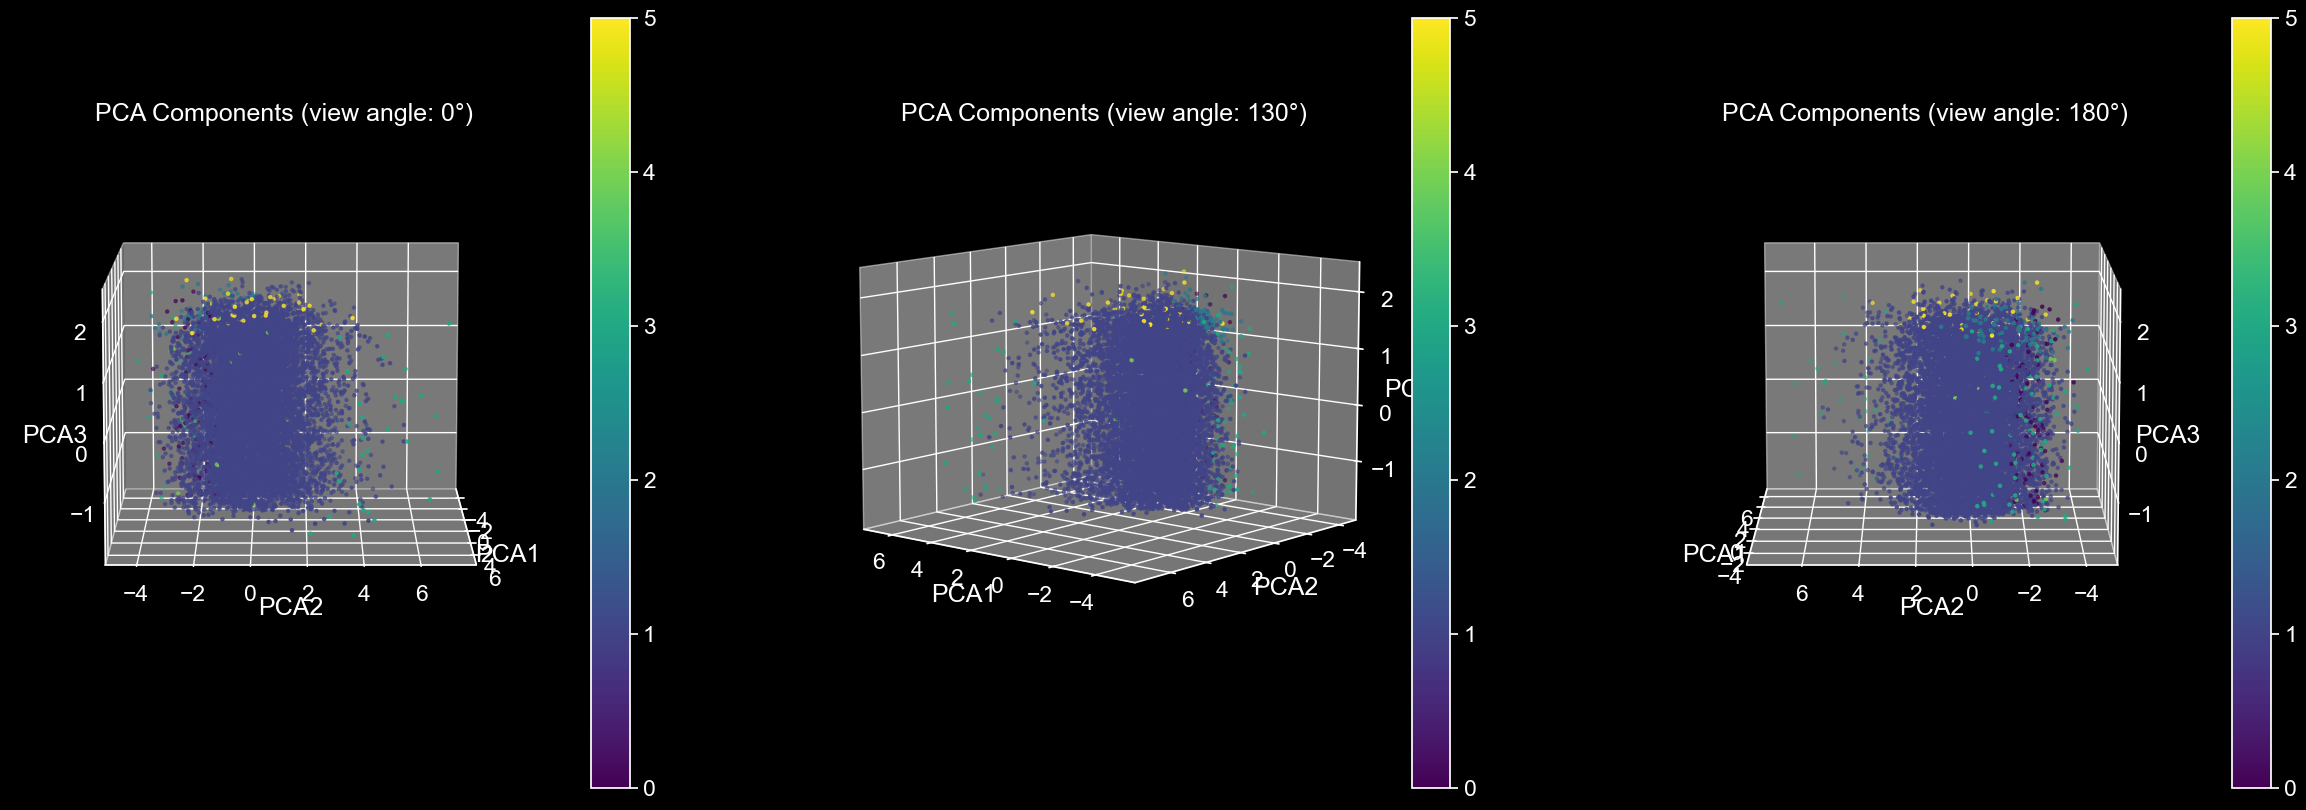

In [61]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_features)

# Add PCA components to the dataframe
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]
data['PCA3'] = pca_components[:, 2]

# Plotting the PCA components with smaller dots and different perspectives
fig = plt.figure(figsize=(30, 10))

# Different perspectives
angles = [0,130, 180]

for i, angle in enumerate(angles):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    sc = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=pd.Categorical(data[target]).codes, cmap='viridis', s=5)  # smaller dots
    ax.view_init(elev=10, azim=angle)
    plt.colorbar(sc, ax=ax)
    ax.set_title(f'PCA Components (view angle: {angle}°)')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

plt.show()

LDA but with failure type as target

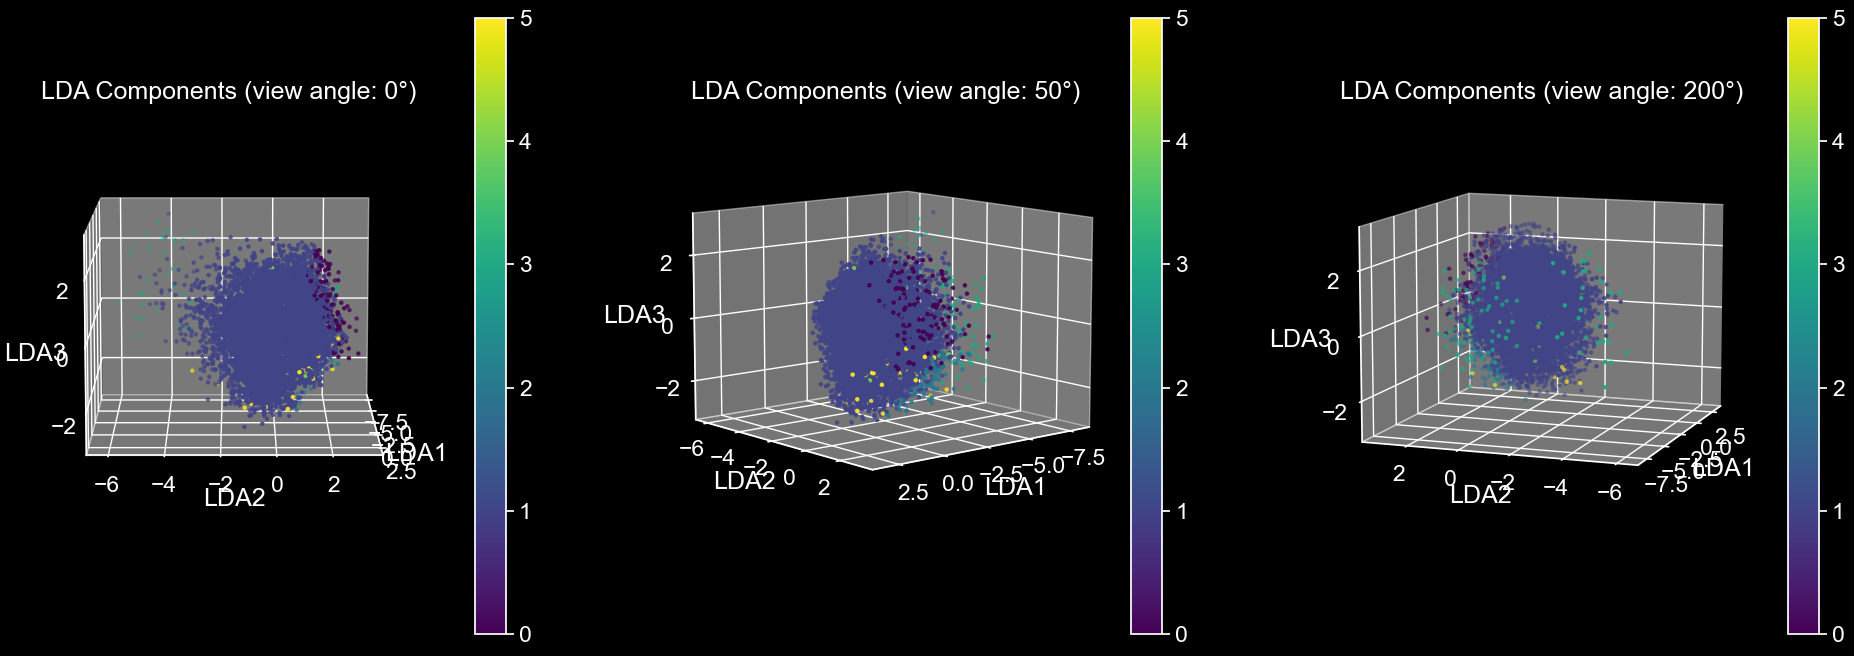

In [70]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Determine the number of unique classes in the target
n_classes = data[target].nunique()

# LDA - set n_components to min(n_features, n_classes - 1)
lda_n_components = min(len(features), n_classes - 1)
lda = LDA(n_components=lda_n_components)
lda_components = lda.fit_transform(scaled_features, data[target])

# Add LDA components to the dataframe
data['LDA1'] = lda_components[:, 0]
if lda_n_components > 1:
    data['LDA2'] = lda_components[:, 1]
if lda_n_components > 2:
    data['LDA3'] = lda_components[:, 2]

# Plotting the LDA components
if lda_n_components == 1:
    fig, ax = plt.subplots(figsize=(10, 6))
    sc = ax.scatter(data['LDA1'], np.zeros_like(data['LDA1']), c=pd.Categorical(data[target]).codes, cmap='viridis', s=5)
    ax.set_ylabel('Constant')
    ax.set_title('LDA Components')
    ax.set_xlabel('LDA1')
    plt.colorbar(sc)
    plt.show()
elif lda_n_components == 2:
    fig, ax = plt.subplots(figsize=(10, 6))
    sc = ax.scatter(data['LDA1'], data['LDA2'], c=pd.Categorical(data[target]).codes, cmap='viridis', s=5)
    ax.set_ylabel('LDA2')
    ax.set_title('LDA Components')
    ax.set_xlabel('LDA1')
    plt.colorbar(sc)
    plt.show()
else:
    fig = plt.figure(figsize=(24, 8))
    angles = [0, 50, 200]
    for i, angle in enumerate(angles):
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')
        sc = ax.scatter(data['LDA1'], data['LDA2'], data['LDA3'], c=pd.Categorical(data[target]).codes, cmap='viridis', s=5)  # smaller dots
        ax.view_init(elev=10, azim=angle)
        plt.colorbar(sc, ax=ax)
        ax.set_title(f'LDA Components (view angle: {angle}°)')
        ax.set_xlabel('LDA1')
        ax.set_ylabel('LDA2')
        ax.set_zlabel('LDA3')

    plt.show()


ANOVA but when failure type is the target variable

In [71]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Perform ANOVA
anova_results = {}
for feature in features:
    groups = [data[data[target] == cls][feature].values for cls in data[target].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[feature] = {'F-value': f_val, 'p-value': p_val}

# Display the results
anova_results_df = pd.DataFrame.from_dict(anova_results, orient='index')
anova_results_df = anova_results_df.sort_values(by='p-value')

# Print the results
print(anova_results_df)

                            F-value        p-value
Torque [Nm]              104.401379  9.540495e-108
Rotational speed [rpm]    78.214308   9.794010e-81
Tool wear [min]           68.194918   2.508386e-70
Air temperature [K]       38.790896   1.372453e-39
Process temperature [K]    7.602878   3.865152e-07


### Decision Tree, SVM, Random Forest and Logistic Regression for "Target" as target column

Model Accuracy Scores:
Decision Tree Accuracy: 0.9783
Random Forest Accuracy: 0.9870
SVM Accuracy: 0.9690
Logistic Regression Accuracy: 0.9740


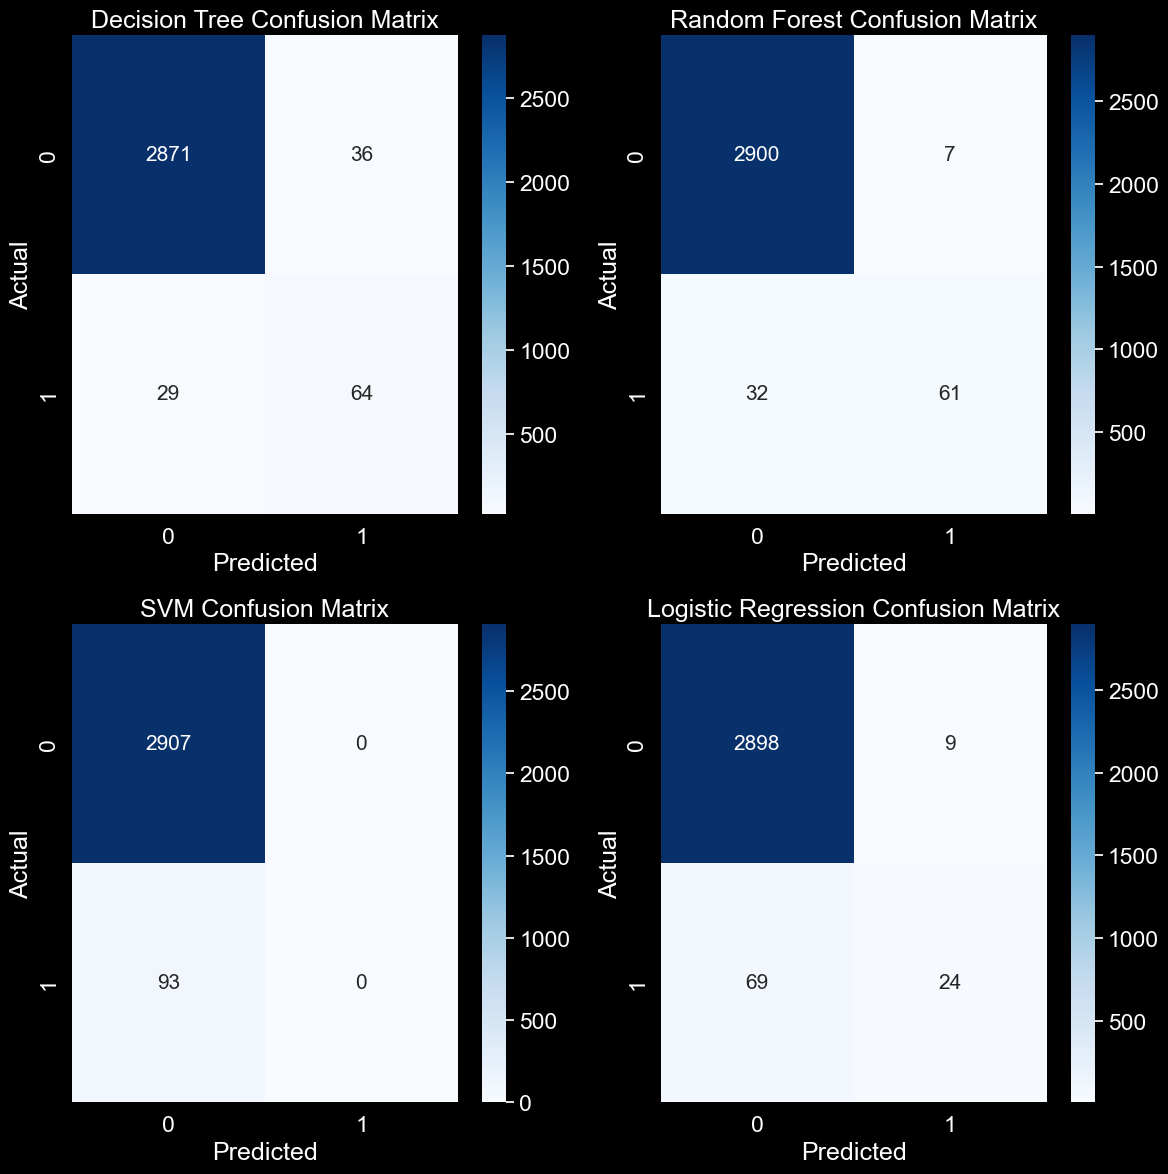

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data[target], test_size=0.3, random_state=42)

# Initialize the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate the models
model_scores = {}
confusion_matrices = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[model_name] = accuracy
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = conf_matrix

# Print the model scores
print("Model Accuracy Scores:")
for model_name, accuracy in model_scores.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for ax, (model_name, conf_matrix) in zip(axes, confusion_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Decision Tree, SVM, Random Forest and Logistic Regression for "Failure Type" as target column

Model Accuracy Scores:
Decision Tree Accuracy: 0.9780
Random Forest Accuracy: 0.9843
SVM Accuracy: 0.9803
Logistic Regression Accuracy: 0.9790


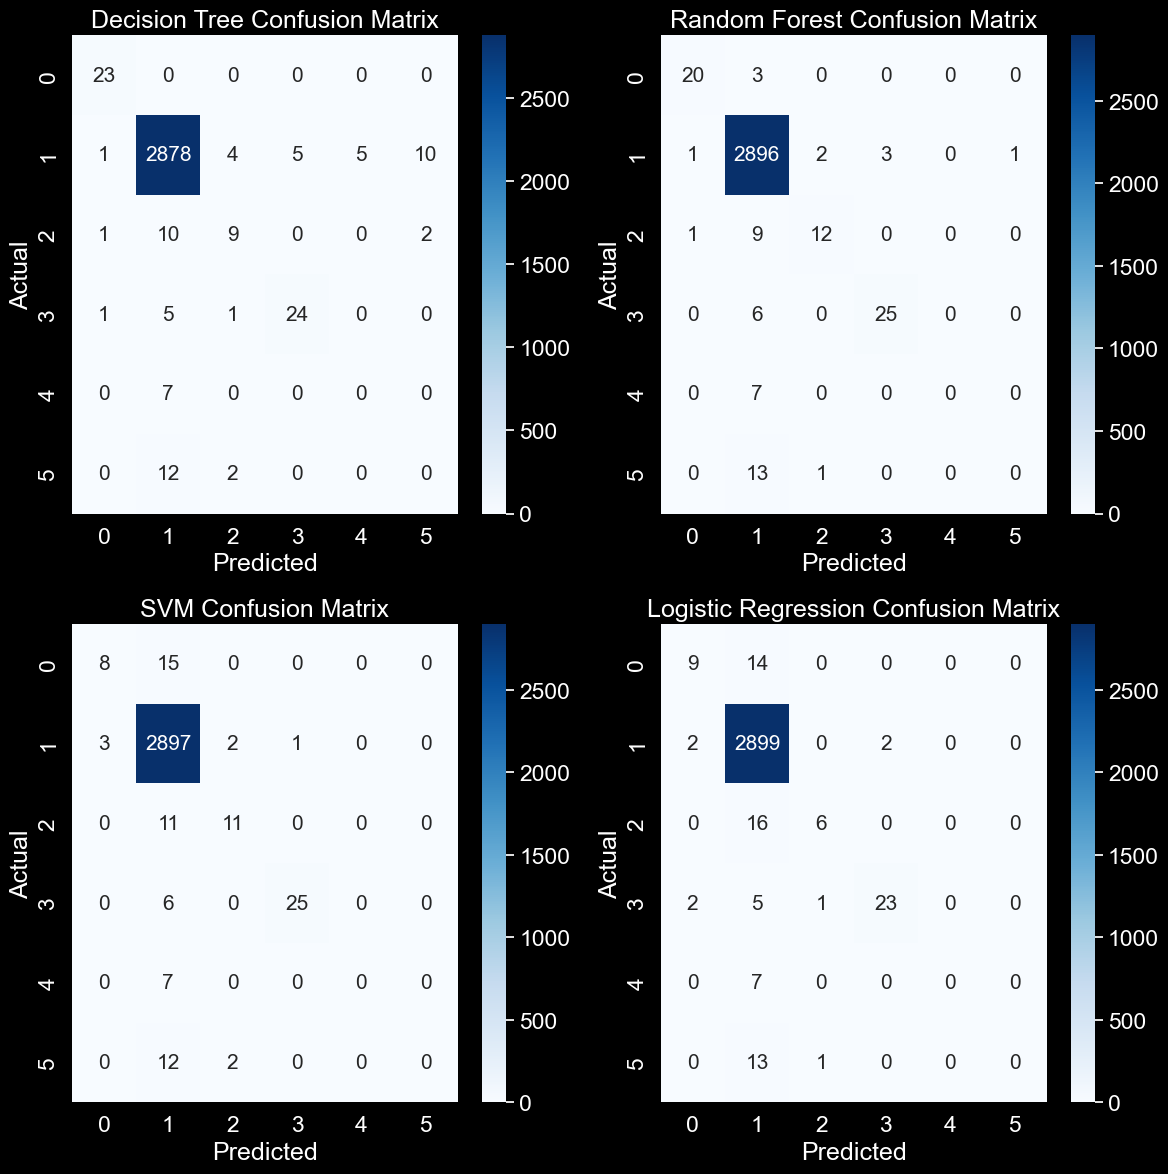

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Encode the target column
data[target] = pd.Categorical(data[target]).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data[target], test_size=0.3, random_state=42)

# Initialize the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate the models
model_scores = {}
confusion_matrices = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[model_name] = accuracy
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = conf_matrix

# Print the model scores
print("Model Accuracy Scores:")
for model_name, accuracy in model_scores.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for ax, (model_name, conf_matrix) in zip(axes, confusion_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Graphical representation of Decision Tree Algorithm on projection of data on the first 2 principal components.
"Target" column as target

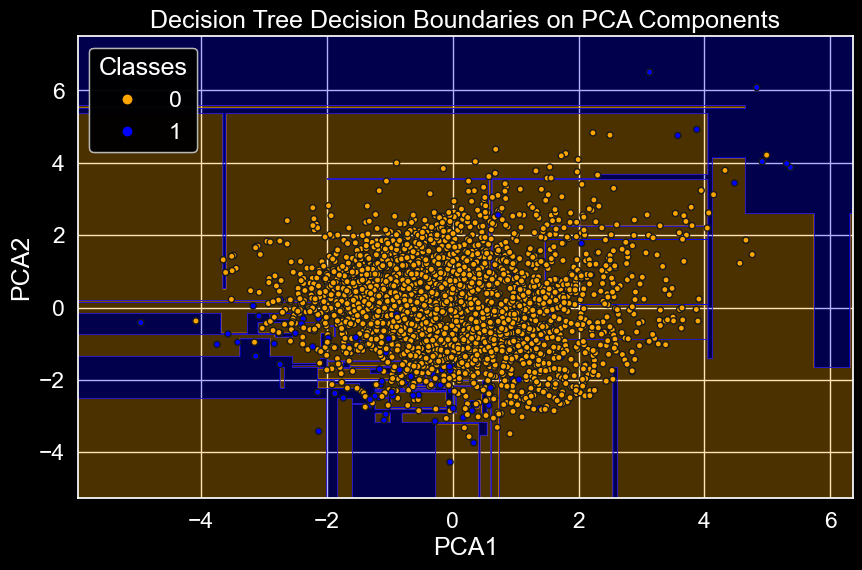

In [77]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_components, data[target], test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Plot the data and decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundaries(X_test, y_test, decision_tree, ax)
ax.set_title('Decision Tree Decision Boundaries on PCA Components')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
plt.show()

### Graphical representation of Decision Tree Algorithm on projection of data on the first 2 principal components.
"Failure Type" column as target

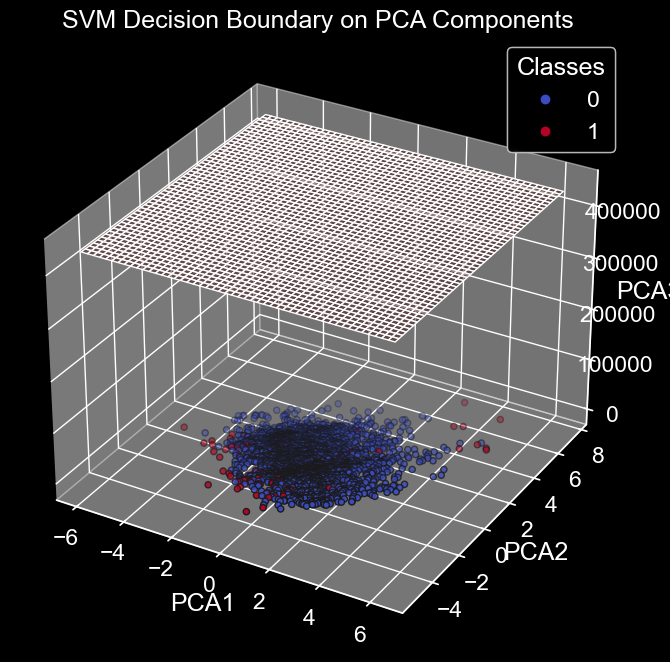

In [79]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_components, data[target], test_size=0.3, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Plotting the data and SVM hyperplane in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap=cm.coolwarm, s=20, edgecolor='k')

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min()-1, X_test[:, 0].max()+1, 50),
                     np.linspace(X_test[:, 1].min()-1, X_test[:, 1].max()+1, 50))
zz = (-svm_model.intercept_[0] - svm_model.coef_[0][0] * xx - svm_model.coef_[0][1] * yy) / svm_model.coef_[0][2]

# Plot the hyperplane
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5)

# Labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('SVM Decision Boundary on PCA Components')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

        F-value        p-value
PC4  316.473820  1.430259e-315
PC5  166.885727  5.375227e-171
PC2   76.063206   1.668424e-78
PC3   68.197145   2.495032e-70
PC1   16.819219   1.371672e-16
The two best principal components are: ['PC4', 'PC5']


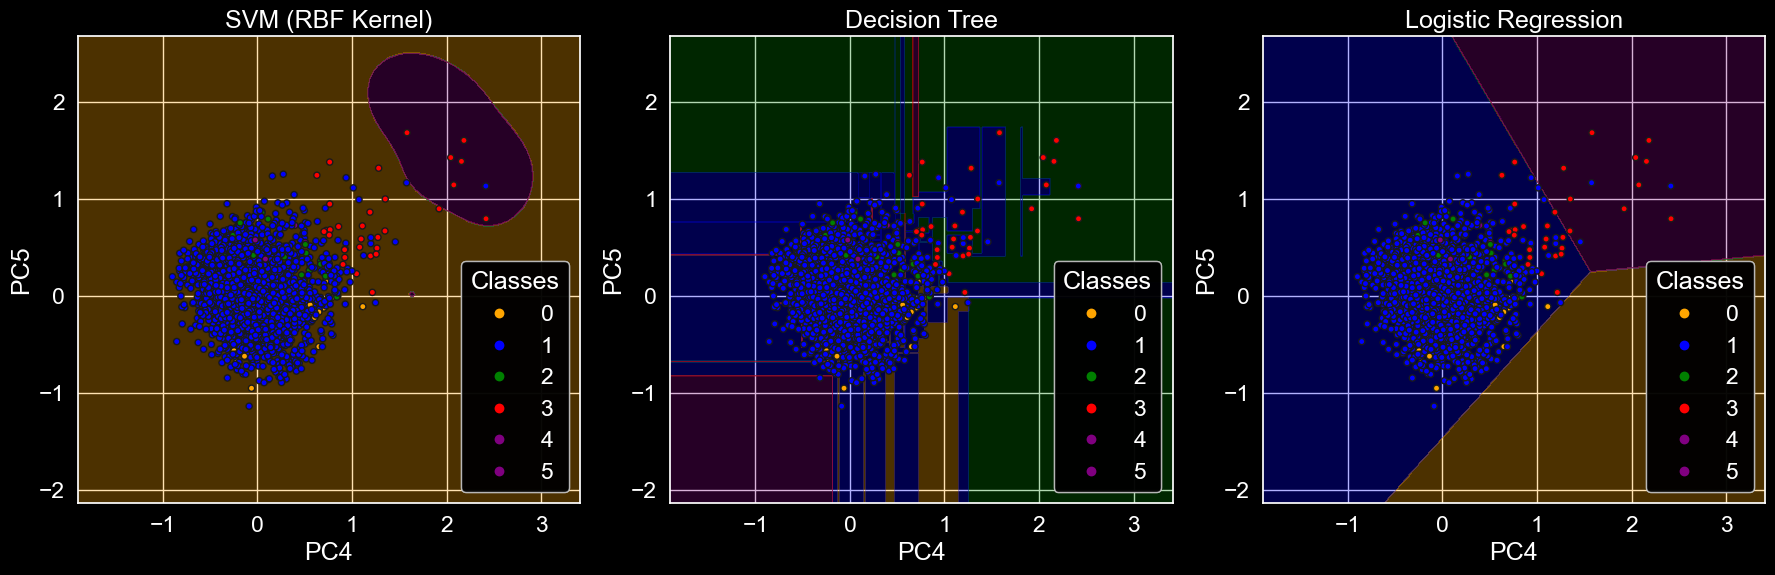

In [85]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Encode the target column
data[target] = pd.Categorical(data[target]).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)

# Create a dataframe for PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
pca_df[target] = data[target]

# Perform ANOVA on the principal components
anova_results = {}
for component in pca_df.columns[:-1]:  # Exclude the target column
    groups = [pca_df[pca_df[target] == cls][component].values for cls in pca_df[target].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[component] = {'F-value': f_val, 'p-value': p_val}

# Display the results
anova_results_df = pd.DataFrame.from_dict(anova_results, orient='index')
anova_results_df = anova_results_df.sort_values(by='p-value')

# Print the results
print(anova_results_df)

# Identify the two best components
best_components = anova_results_df.index[:2].tolist()
print(f'The two best principal components are: {best_components}')

# Define the function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel(best_components[0])
    ax.set_ylabel(best_components[1])

# Prepare the data
X = pca_df[best_components].values
y = pca_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and plot the models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (model_name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundaries(X_test, y_test, model, model_name, ax)

plt.tight_layout()
plt.show()

        F-value        p-value
PC4  914.386795  2.784876e-192
PC2  177.874524   3.110991e-40
PC3  108.587269   2.692627e-25
PC5  108.234450   3.211107e-25
PC1   15.553599   8.074634e-05
The two best principal components are: ['PC4', 'PC2']


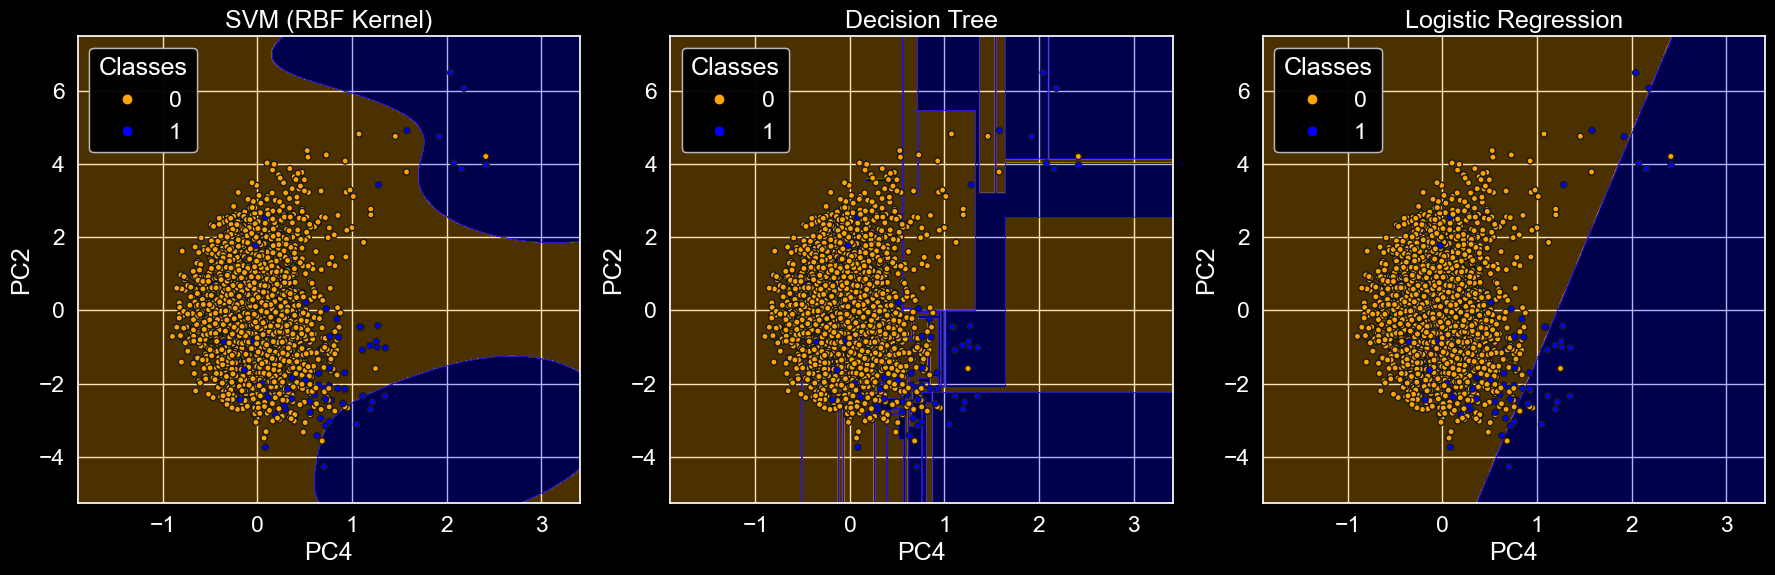

In [86]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)

# Create a dataframe for PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
pca_df[target] = data[target]

# Perform ANOVA on the principal components
anova_results = {}
for component in pca_df.columns[:-1]:  # Exclude the target column
    groups = [pca_df[pca_df[target] == cls][component].values for cls in pca_df[target].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[component] = {'F-value': f_val, 'p-value': p_val}

# Display the results
anova_results_df = pd.DataFrame.from_dict(anova_results, orient='index')
anova_results_df = anova_results_df.sort_values(by='p-value')

# Print the results
print(anova_results_df)

# Identify the two best components
best_components = anova_results_df.index[:2].tolist()
print(f'The two best principal components are: {best_components}')

# Define the function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel(best_components[0])
    ax.set_ylabel(best_components[1])

# Prepare the data
X = pca_df[best_components].values
y = pca_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and plot the models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (model_name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundaries(X_test, y_test, model, model_name, ax)

plt.tight_layout()
plt.show()

        F-value        p-value
PC4  316.473820  1.430259e-315
PC5  166.885727  5.375227e-171
PC2   76.063206   1.668424e-78
PC3   68.197145   2.495032e-70
PC1   16.819219   1.371672e-16
The three best principal components are: ['PC4', 'PC5', 'PC2']


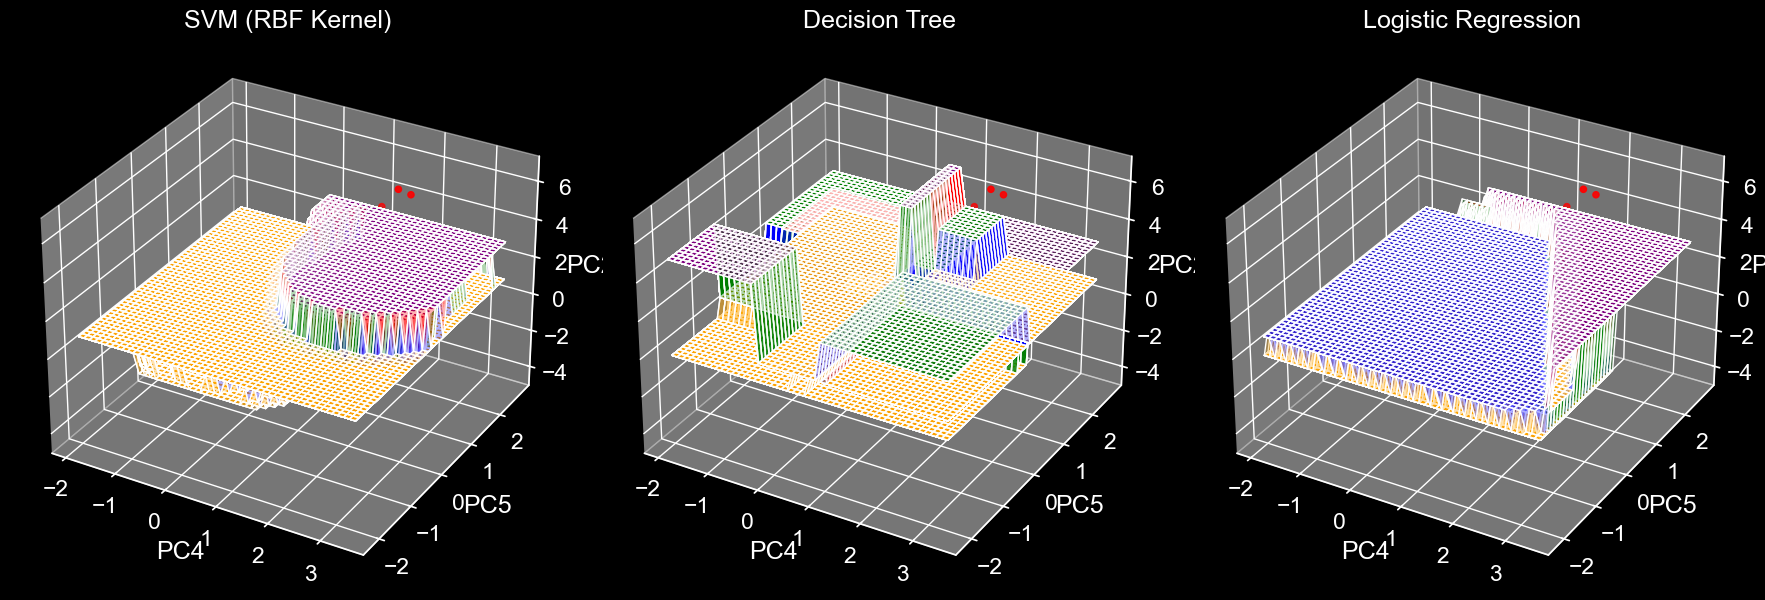

In [88]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Encode the target column
data[target] = pd.Categorical(data[target]).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)

# Create a dataframe for PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
pca_df[target] = data[target]

# Perform ANOVA on the principal components
anova_results = {}
for component in pca_df.columns[:-1]:  # Exclude the target column
    groups = [pca_df[pca_df[target] == cls][component].values for cls in pca_df[target].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[component] = {'F-value': f_val, 'p-value': p_val}

# Display the results
anova_results_df = pd.DataFrame.from_dict(anova_results, orient='index')
anova_results_df = anova_results_df.sort_values(by='p-value')

# Print the results
print(anova_results_df)

# Identify the three best components
best_components = anova_results_df.index[:3].tolist()
print(f'The three best principal components are: {best_components}')

# Define the function to plot decision boundaries
def plot_decision_boundaries_3d(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    zz = np.array([model.predict(np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, z)]).reshape(xx.shape)
                   for z in np.linspace(z_min, z_max, 50)])

    for i, z in enumerate(np.linspace(z_min, z_max, 50)):
        ax.plot_surface(xx, yy, zz[i], alpha=0.3, cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))
    ax.set_title(title)
    ax.set_xlabel(best_components[0])
    ax.set_ylabel(best_components[1])
    ax.set_zlabel(best_components[2])

# Prepare the data
X = pca_df[best_components].values
y = pca_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and plot the models
fig = plt.figure(figsize=(18, 6))
for i, (model_name, model) in enumerate(models.items()):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    model.fit(X_train, y_train)
    plot_decision_boundaries_3d(X_test, y_test, model, model_name, ax)

plt.tight_layout()
plt.show()


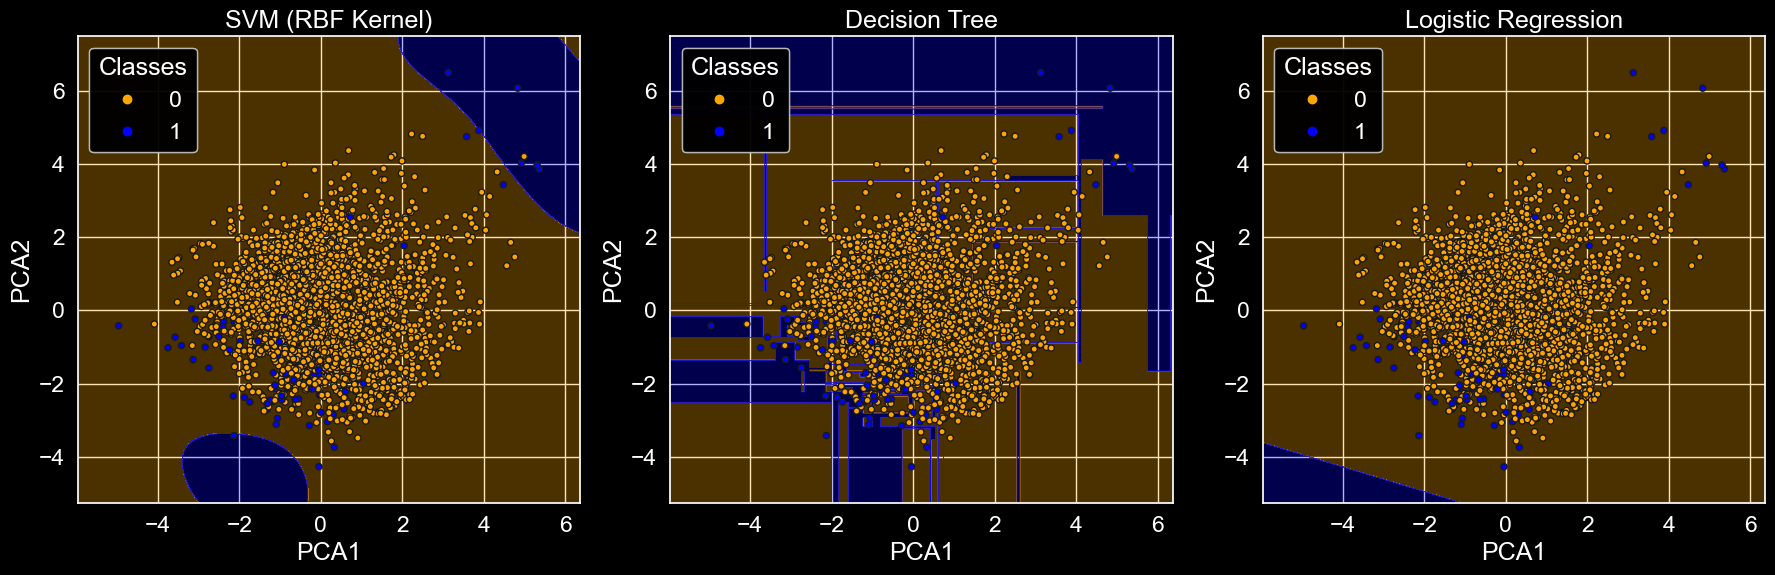

In [89]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a dataframe for PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df[target] = data[target]

# Prepare the data
X = pca_df[['PCA1', 'PCA2']].values
y = pca_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Define the function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')

# Train and plot the models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (model_name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundaries(X_test, y_test, model, model_name, ax)

plt.tight_layout()
plt.show()

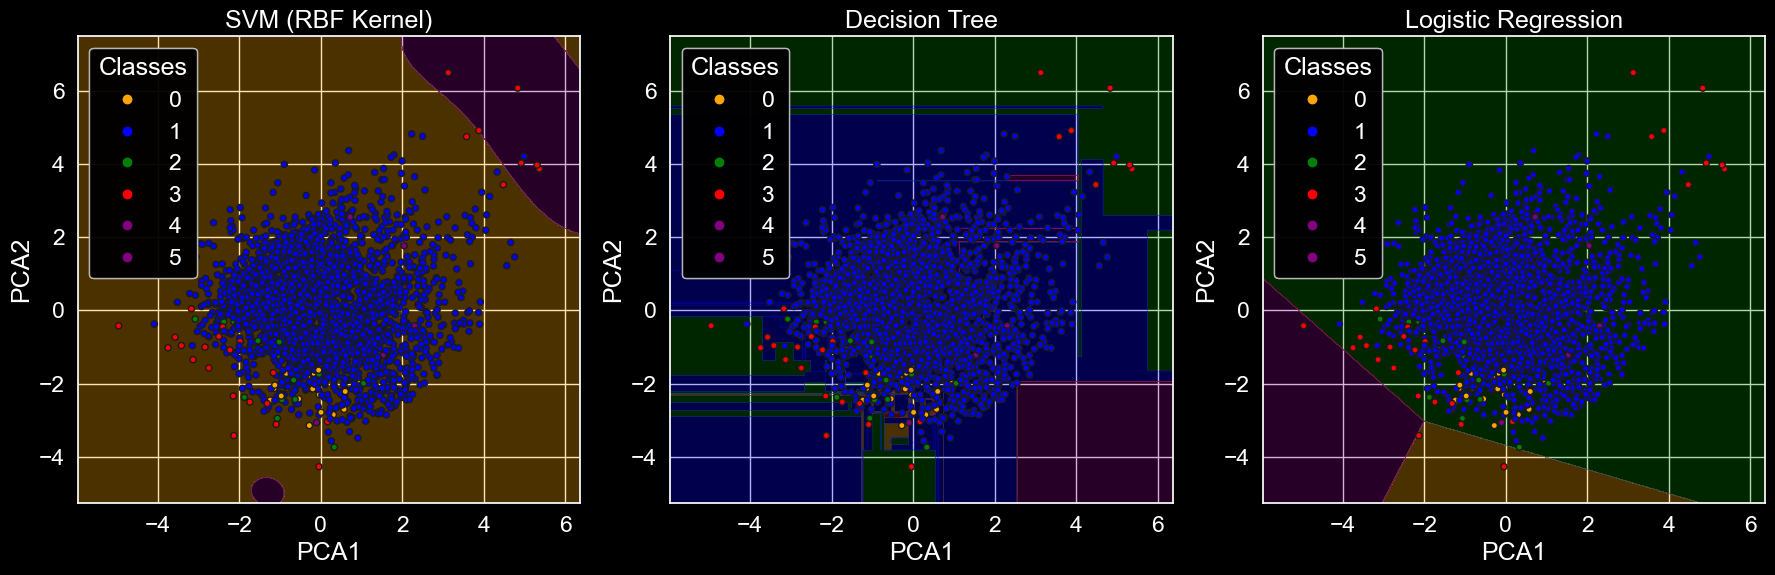

In [90]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Encode the target column
data[target] = pd.Categorical(data[target]).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a dataframe for PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df[target] = data[target]

# Prepare the data
X = pca_df[['PCA1', 'PCA2']].values
y = pca_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Define the function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')

# Train and plot the models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (model_name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundaries(X_test, y_test, model, model_name, ax)

plt.tight_layout()
plt.show()

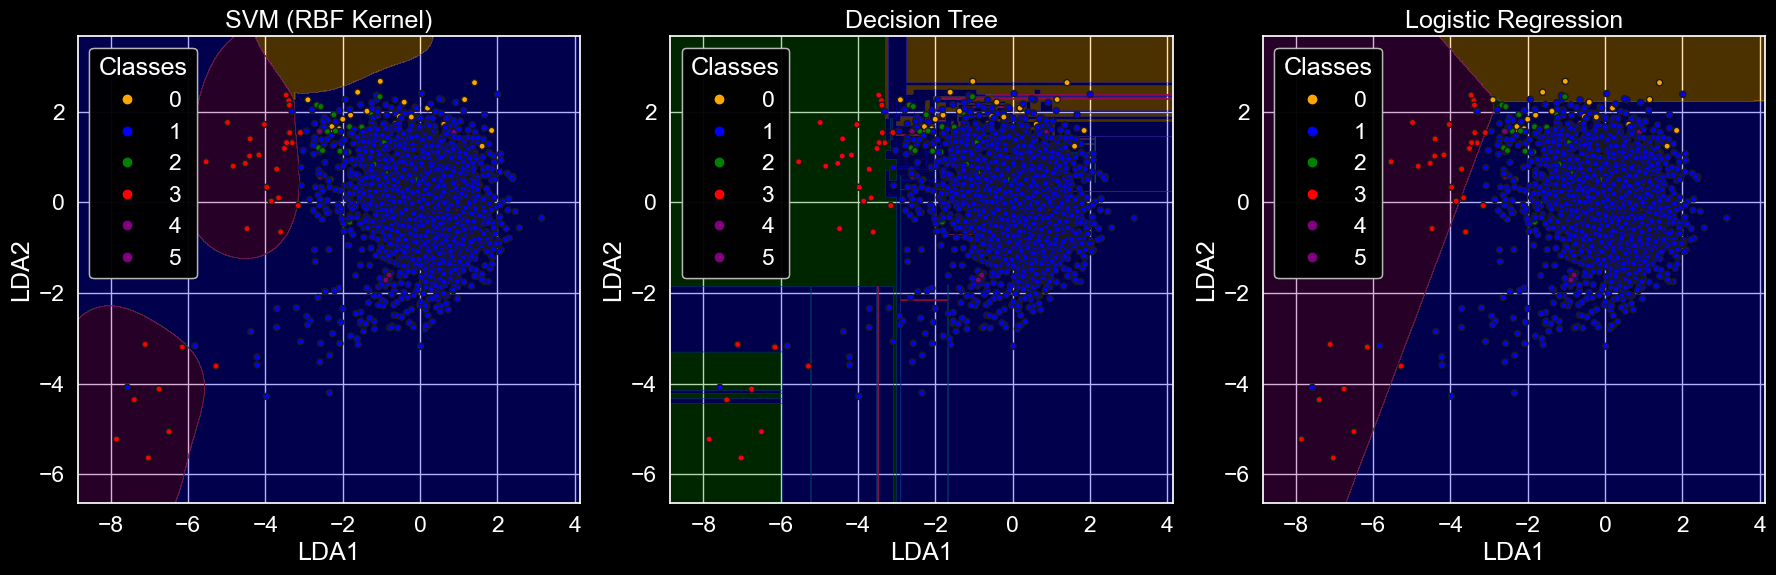

In [91]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Target'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Encode the target column
data[target] = pd.Categorical(data[target]).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform LDA
lda = LDA(n_components=2)
lda_components = lda.fit_transform(scaled_features, data[target])

# Create a dataframe for LDA components
lda_df = pd.DataFrame(lda_components, columns=['LDA1', 'LDA2'])
lda_df[target] = data[target]

# Prepare the data
X = lda_df[['LDA1', 'LDA2']].values
y = lda_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Define the function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue', 'green', 'red', 'purple')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('LDA1')
    ax.set_ylabel('LDA2')

# Train and plot the models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (model_name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundaries(X_test, y_test, model, model_name, ax)

plt.tight_layout()
plt.show()

Number of LDA components: 1


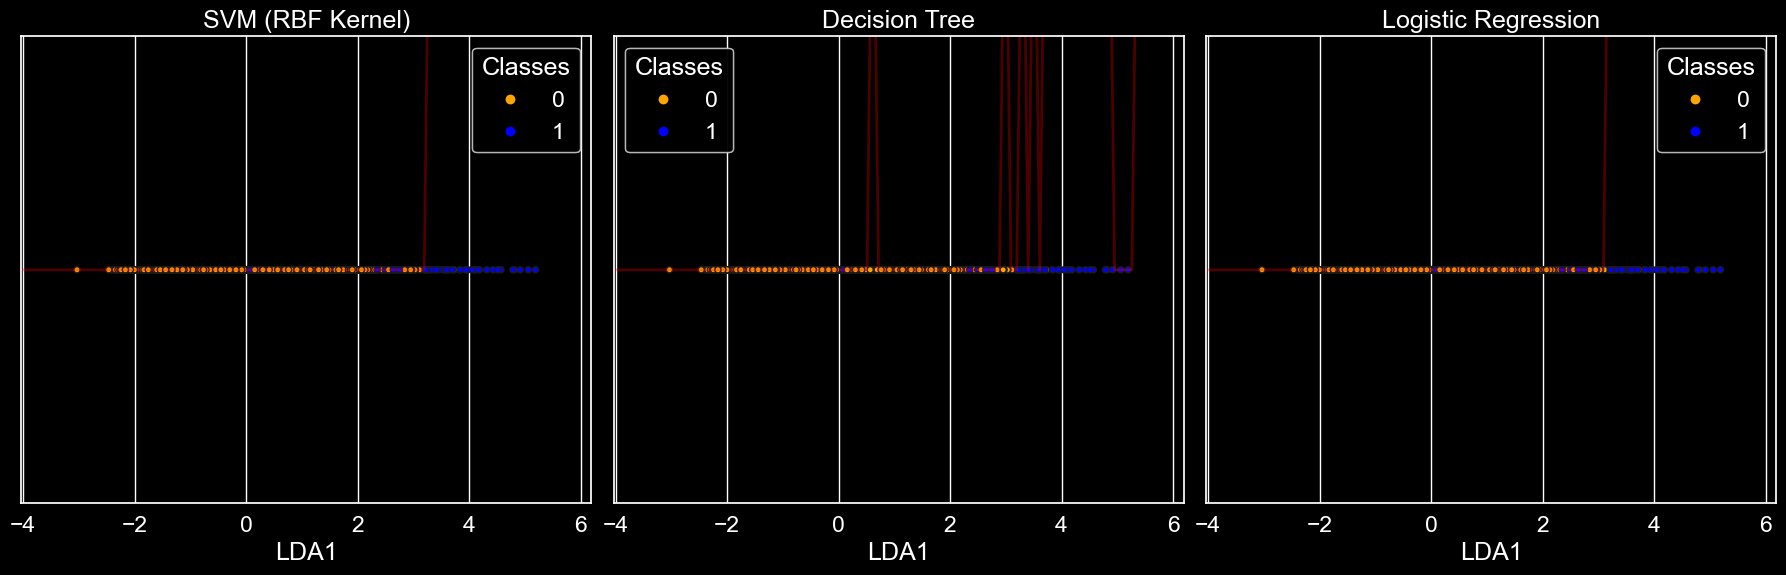

In [92]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")

# Drop the unnecessary columns
data = data.drop(columns=['Type', 'UDI', 'Product ID', 'Failure Type'])

# Define feature columns and target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

# Encode the target column
data[target] = pd.Categorical(data[target]).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Perform LDA
lda = LDA(n_components=None)  # Automatically set the number of components to min(n_classes - 1, n_features)
lda_components = lda.fit_transform(scaled_features, data[target])

# Check the number of LDA components
n_components = lda_components.shape[1]
print(f"Number of LDA components: {n_components}")

# Create a dataframe for LDA components
lda_df = pd.DataFrame(lda_components, columns=[f'LDA{i+1}' for i in range(n_components)])
lda_df[target] = data[target]

# Prepare the data
X = lda_df.iloc[:, :-1].values  # All LDA components
y = lda_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Define the function to plot decision boundaries
def plot_decision_boundaries_2d(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('LDA1')
    ax.set_ylabel('LDA2')

# Define the function to plot decision boundaries in 1D
def plot_decision_boundaries_1d(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    Z = model.predict(xx)
    ax.plot(xx, Z, alpha=0.3, color='red', lw=2)
    scatter = ax.scatter(X[:, 0], np.zeros_like(X[:, 0]), c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue')))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(-0.5, 0.5)
    ax.set_title(title)
    ax.set_xlabel('LDA1')
    ax.set_yticks([])

# Train and plot the models
if n_components > 1:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, (model_name, model) in zip(axes, models.items()):
        model.fit(X_train, y_train)
        plot_decision_boundaries_2d(X_test, y_test, model, model_name, ax)
else:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, (model_name, model) in zip(axes, models.items()):
        model.fit(X_train, y_train)
        plot_decision_boundaries_1d(X_test, y_test, model, model_name, ax)

plt.tight_layout()
plt.show()